In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
!apt-get -V -y -qq install python-cartopy python3-cartopy

!pip uninstall shapely -y

!pip install shapely --no-binary shapely

In [ ]:
!pip install cftime
!pip install utils
!pip install netCDF4 
!pip install scipy
!pip install "xarray[io]"
!pip install geopandas
!pip install cartopy
!pip install eofs
#https://github.com/ajdawson/eofs/blob/master/examples/xarray/sst_example.py

In [12]:
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from eofs.xarray import Eof
from eofs.examples import example_data_path
import netCDF4
import netCDF4 as nc
import xarray as xr
import datetime
import datetime as dt
from netCDF4 import date2num,num2date
import cftime
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import utils
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import time

from sklearn.decomposition import PCA
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [13]:
path2 = ('mock.nc')
data1 = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
data5 = xr.open_dataset(path2) # To view time in datetime format
data1
#data5['time']

/usr/local/lib/python3.7/dist-packages/xarray/backends/plugins.py:65: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  backend = entrypoint.load()


<xarray.Dataset>
Dimensions:    (time: 365, longitude: 41, latitude: 41)
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Data variables:
    sp         (time, latitude, longitude) float64 ...
    sst        (time, latitude, longitude) float64 ...
    u10        (time, latitude, longitude) float64 ...
    v10        (time, latitude, longitude) float64 ...
    sshf       (time, latitude, longitude) float64 ...
    slhf       (time, latitude, longitude) float64 ...
    t2m        (time, latitude, longitude) float64 ...
Attributes:
    title:          Daily variables from ERA5 hourly data
    history:        Wed Mar 23 12:01:11 2022: ncrcat ERA5_meteo_sfc_2021_01-0...
    Input dataset:  /global/cscratch1/sd/xzheng/ENA/rawdata/ERA5_meteo_sfc_20...
    NCO:            netCDF Operators version 5.0.1 (Homepage = http://nco.sf....

In [14]:
import xarray as xr

ds = xr.open_dataset('mock.nc', decode_times=False)
df = ds.to_dataframe()

df


sp         sst       u10       v10  \
time  longitude latitude                                                  
0.0   -33.0     43.00     102443.676498  290.120809 -4.228059  6.211163   
                42.75     102431.303226  290.198989 -4.576805  6.044397   
                42.50     102417.453815  290.163838 -4.906288  5.802354   
                42.25     102405.135686  289.908009 -5.190528  5.499212   
                42.00     102391.629859  289.776023 -5.454725  5.185138   
...                                 ...         ...       ...       ...   
364.0 -23.0     34.00     100905.271497  293.089999  6.862594  9.213775   
                33.75     100948.510993  293.258117  6.743592  9.026567   
                33.50     100985.481762  293.378494  6.466007  8.920444   
                33.25     101026.020066  293.384419  6.076012  8.805757   
                33.00     101064.596839  293.344269  5.776225  8.797903   

                                  sshf           slhf         t2m  
time  longitude latitude                                           
0.0   -33.0     43.00    -54768.985283 -366915.151420  288.584571  
                42.75    -58761.417840 -377165.066486  288.613673  
                42.50    -57550.053178 -371312.809607  288.611921  
                42.25    -46510.295414 -341469.980193  288.590937  
                42.00    -41360.587035 -323312.525079  288.588804  
...                                ...            ...         ...  
364.0 -23.0     34.00      3654.382668 -473857.976859  292.832591  
                33.75     -4249.277246 -447770.452034  292.894384  
                33.50     -7419.182124 -423715.314385  292.966493  
                33.25     -3367.544079 -389930.235044  293.024903  
                33.00      2512.578140 -358101.440277  293.085051  

[613565 rows x 7 columns]

In [15]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('mock.nc')

df = ds.to_dataframe()

sst = ds['sst']
sst

<xarray.DataArray 'sst' (time: 365, latitude: 41, longitude: 41)>
array([[[290.120809, 289.951065, ..., 288.388567, 288.198508],
        [290.198989, 289.998528, ..., 288.499833, 288.415408],
        ...,
        [293.819399, 293.749753, ..., 292.599568, 292.535987],
        [293.985156, 293.931781, ..., 292.607502, 292.60067 ]],

       [[290.079384, 289.944177, ..., 288.514767, 288.316202],
        [290.077223, 289.916932, ..., 288.632391, 288.514516],
        ...,
        [294.037136, 293.953407, ..., 292.561155, 292.52903 ],
        [294.059668, 294.07276 , ..., 292.605438, 292.617443]],

       ...,

       [[289.414596, 289.353225, ..., 289.358865, 289.174084],
        [289.608265, 289.487118, ..., 289.420464, 289.399997],
        ...,
        [292.935697, 292.912524, ..., 293.52136 , 293.467424],
        [293.152196, 293.094955, ..., 293.550486, 293.499726]],

       [[289.446257, 289.388732, ..., 289.400795, 289.203366],
        [289.557035, 289.468717, ..., 289.402803, 289.399613],
        ...,
        [292.947204, 292.997751, ..., 293.468805, 293.384419],
        [293.040564, 293.070872, ..., 293.392437, 293.344269]]])
Coordinates:
  * time       (time) float64 0.0 1.0 2.0 3.0 4.0 ... 361.0 362.0 363.0 364.0
  * longitude  (longitude) float32 -33.0 -32.75 -32.5 ... -23.5 -23.25 -23.0
  * latitude   (latitude) float32 43.0 42.75 42.5 42.25 ... 33.5 33.25 33.0
Attributes:
    units:         K
    long_name:     Sea surface temperature
    cell_methods:  time: mean

In [16]:

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)


In [17]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)


Text(0.5, 1.0, 'EOF1 expressed as correlation')

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


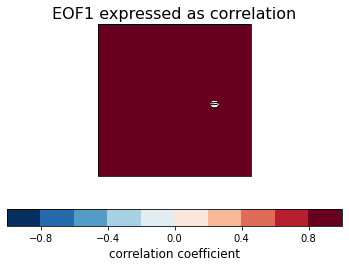

In [21]:

# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)


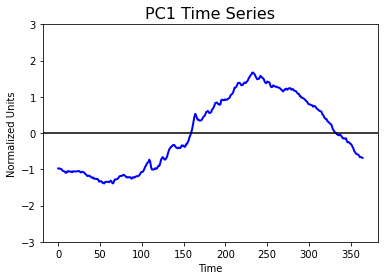

In [20]:

# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Time')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

